In [2]:
# ============================================================
# 1. Importación de librerías
# ============================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# ============================================================
# 2. Cargar y preparar el dataset Iris
# ============================================================

iris = load_iris()
X = iris.data                      # 4 características
y = iris.target.reshape(-1, 1)     # clases: 0, 1, 2

# One-hot encoding para clasificación multiclase
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_onehot, test_size=0.3, random_state=42
)

In [4]:
# ============================================================
# 3. Funciones de activación
# ============================================================

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Derivadas (para entrenamiento)
def relu_deriv(x):
    return (x > 0).astype(float)

def tanh_deriv(x):
    return 1 - np.tanh(x)**2

In [5]:
# ============================================================
# 4. Modelo de neurona simple (perceptrón multicapa de 1 capa)
# ============================================================

class NeuronaSimple:
    def __init__(self, n_inputs, n_outputs, activacion, activacion_deriv):
        self.w = np.random.randn(n_inputs, n_outputs) * 0.1
        self.b = np.zeros((1, n_outputs))
        self.activacion = activacion
        self.activacion_deriv = activacion_deriv

    def forward(self, X):
        self.z = X @ self.w + self.b
        self.a = self.activacion(self.z)
        return self.a

    def backward(self, X, y, lr=0.01):
        m = X.shape[0]
        error = self.a - y
        dz = error * self.activacion_deriv(self.z)
        dw = (X.T @ dz) / m
        db = np.sum(dz, axis=0, keepdims=True) / m

        self.w -= lr * dw
        self.b -= lr * db

    def train(self, X, y, epochs=500, lr=0.01):
        losses = []
        for _ in range(epochs):
            self.forward(X)
            loss = np.mean((self.a - y)**2)
            losses.append(loss)
            self.backward(X, y, lr)
        return losses

In [6]:
# ============================================================
# 5. Entrenar dos modelos: ReLU y tanh
# ============================================================

modelo_relu = NeuronaSimple(4, 3, relu, relu_deriv)
modelo_tanh = NeuronaSimple(4, 3, tanh, tanh_deriv)

loss_relu = modelo_relu.train(X_train, y_train, epochs=800, lr=0.01)
loss_tanh = modelo_tanh.train(X_train, y_train, epochs=800, lr=0.01)

In [7]:
# ============================================================
# 6. Evaluación
# ============================================================

def accuracy(modelo, X, y_true):
    y_pred = modelo.forward(X)
    pred_clases = np.argmax(y_pred, axis=1)
    true_clases = np.argmax(y_true, axis=1)
    return np.mean(pred_clases == true_clases)

acc_relu = accuracy(modelo_relu, X_test, y_test)
acc_tanh = accuracy(modelo_tanh, X_test, y_test)

print("Exactitud con ReLU:", acc_relu)
print("Exactitud con tanh:", acc_tanh)

Exactitud con ReLU: 0.8888888888888888
Exactitud con tanh: 0.8222222222222222


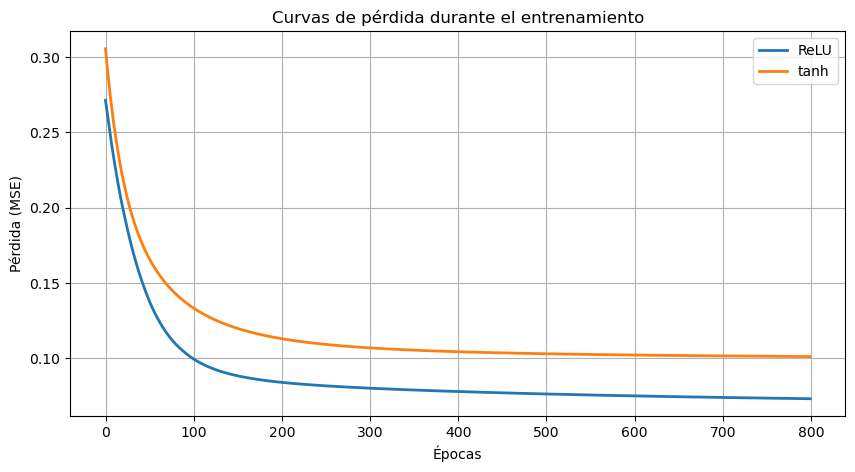

Precisión del modelo con ReLU: 0.8888888888888888
Precisión del modelo con tanh: 0.8222222222222222


In [8]:
# ============================================================
# 7. Gráfica de pérdidas
# ============================================================

plt.figure(figsize=(10,5))
plt.plot(loss_relu, label="ReLU", linewidth=2)
plt.plot(loss_tanh, label="tanh", linewidth=2)
plt.title("Curvas de pérdida durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.grid(True)
plt.legend()
plt.show()


# Función para convertir salidas en clases
def predict_classes(model, X):
    # Ejecuta el forward del modelo
    y_pred = model.forward(X)
    # Convierte la salida continua en clases (0,1,2)
    return np.argmax(y_pred, axis=1)

# Función para calcular precisión
def accuracy(model, X, y_true):
    y_pred_classes = predict_classes(model, X)
    y_true_classes = np.argmax(y_true, axis=1)
    return np.mean(y_pred_classes == y_true_classes)

# Aplicar los modelos al conjunto de prueba
acc_relu = accuracy(modelo_relu, X_test, y_test)
acc_tanh = accuracy(modelo_tanh, X_test, y_test)

print("Precisión del modelo con ReLU:", acc_relu)
print("Precisión del modelo con tanh:", acc_tanh)


In [9]:
# Con función de activación Sigmoide:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)


In [10]:
# Entrenar un modelo con sigmoide

modelo_sigmoid = NeuronaSimple(4, 3, sigmoid, sigmoid_deriv)
loss_sigmoid = modelo_sigmoid.train(X_train, y_train, epochs=800, lr=0.01)


In [11]:
# Calcular la precisión del modelo con sigmoide

acc_sigmoid = accuracy(modelo_sigmoid, X_test, y_test)
print("Precisión del modelo con sigmoide:", acc_sigmoid)


Precisión del modelo con sigmoide: 0.8222222222222222
